# Разделимость данных

Примените алгоритмы уменьшения размерности к данным из предыдущей лабораторной, объясните полученные результаты

1. С помощью любого из рассмотренных на лекциях алгоритмов снижения размерности спроецируйте тренировочные данные в 2d пространство. Визуализируйте результаты снижения размерности. Цветом обозначьте категорию объекта
1. Примените алгоритм кластеризации к спроецированным данным. Расчитайте средние внутрикластерное и межкласторное расстояния получившейся проекции
1. Опишите результаты 

### imports and stuff

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Data\ Analysis

/content/drive/MyDrive/Data Analysis


In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 2.7 MB/s 
     |████████████████████████████████| 1.1 MB 10.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=e960bd143e8e4d389be647f31128354e967ca7a69a5b782e99bb74a273149f09
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=87f6ef92f540f88bda973deb7def3364bbf7f4cc265dd7d1984e4d03e3a7e8c4
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from scipy.spatial import distance
import umap

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

### load data

In [ ]:
df = pd.read_csv('data/spotify/Spotify_lab4.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head(3)

,genre,acousticness,danceability,energy,loudness
0,1,0.29700,0.752,0.488,-7.050
1,1,0.01160,0.464,0.852,-3.804
2,1,0.00847,0.560,0.936,-5.835


In [ ]:
X = df[['acousticness', 'danceability', 'energy', 'loudness']].values
y = df['genre'].values

## 2D embedding

### apply TSNE

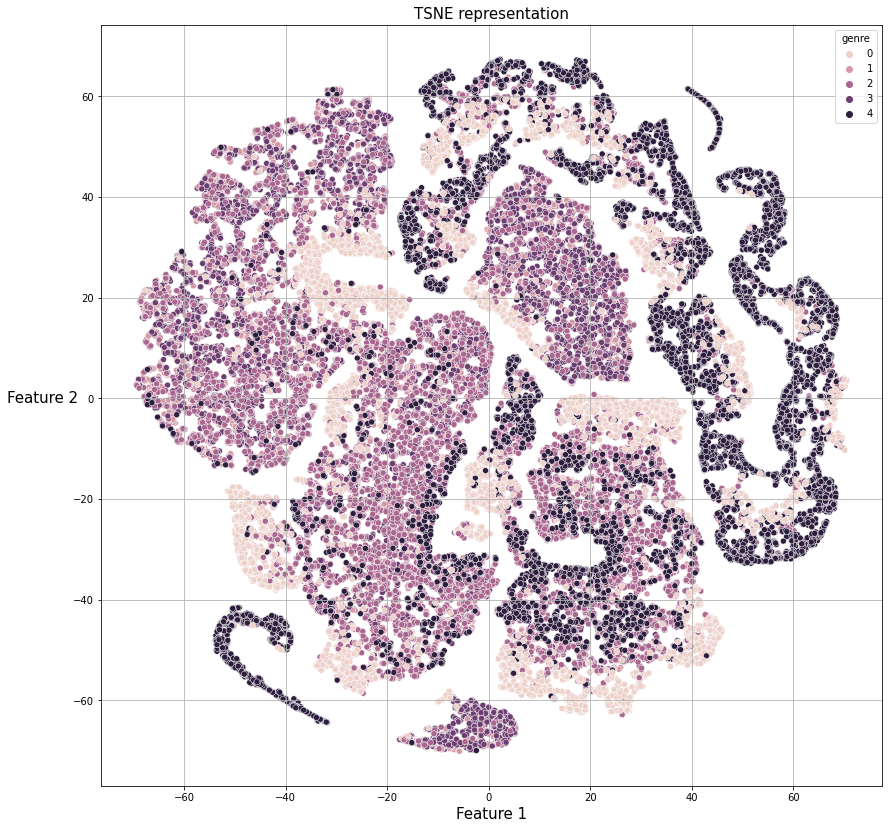

In [ ]:
X_embedded_tsne = TSNE(n_components=2, random_state=0).fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 14))

ax.set_title('TSNE representation', fontsize=15)
ax.set_xlabel('Feature 1', fontsize=15)
ax.set_ylabel('Feature 2', rotation=0, labelpad=30, fontsize=15)
ax.grid()

sns.scatterplot(
    x=X_embedded_tsne[:, 0], 
    y=X_embedded_tsne[:, 1], 
    hue=df['genre'],
    ax=ax
);

In [ ]:
np.save('data/spotify/Spotify_embedded_tsne.npy', X_embedded_tsne)

### apply PCA

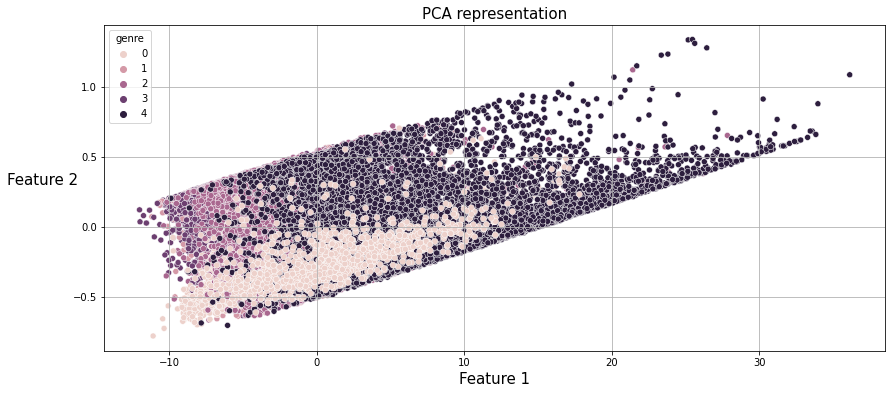

In [ ]:
pca = PCA(n_components=2)
X_embedded_pca = pca.fit_transform(X) 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

ax.set_title('PCA representation', fontsize=15)
ax.set_xlabel('Feature 1', fontsize=15)
ax.set_ylabel('Feature 2', rotation=0, labelpad=30, fontsize=15)
ax.grid()

sns.scatterplot(
    x=X_embedded_pca[:, 0], 
    y=X_embedded_pca[:, 1], 
    hue=df['genre'],
    ax=ax
);

### apply UMAP

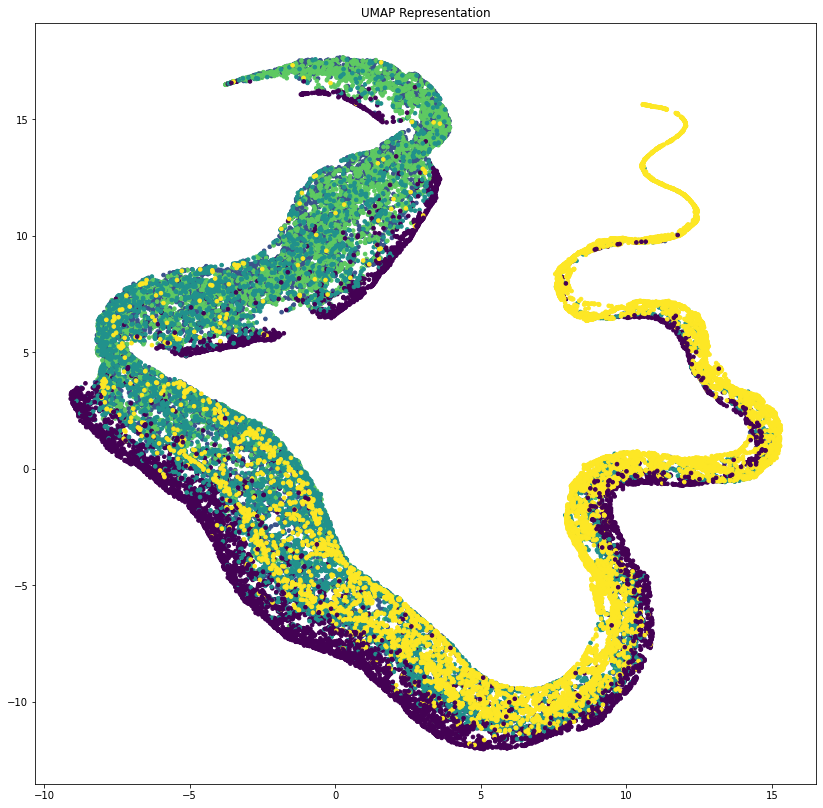

In [ ]:
X_embedded_umap = umap.UMAP().fit_transform(X)

plt.figure(figsize=(14, 14))
plt.title('UMAP Representation')
plt.scatter(X_embedded_umap[:, 0], X_embedded_umap[:, 1], s=13, c=y)

In [ ]:
umap_reducer = umap.UMAP(n_neighbors=100, min_dist = 0.1, random_state=0)
X_normalized = StandardScaler().fit_transform(X)
umap_reducer.fit(X_normalized)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


UMAP(n_neighbors=100, random_state=0, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

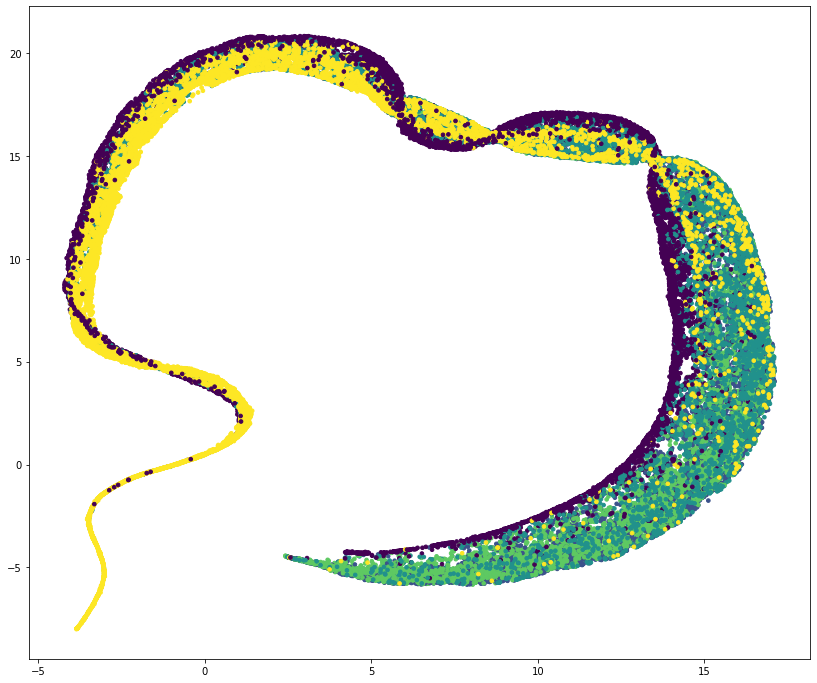

In [ ]:
X_embedded_umap = umap_reducer.transform(X_normalized)

plt.figure(figsize=(14,12))
plt.scatter(X_embedded_umap[:, 0], X_embedded_umap[:, 1], c=y, s=13)
plt.show()

In [ ]:
np.save('data/spotify/Spotify_embedded_umap.npy', X_embedded_umap)

## Clustering embedded data

### apply DBSCAN

In [ ]:
X_embedded_umap = np.load('data/spotify/Spotify_embedded_umap.npy')

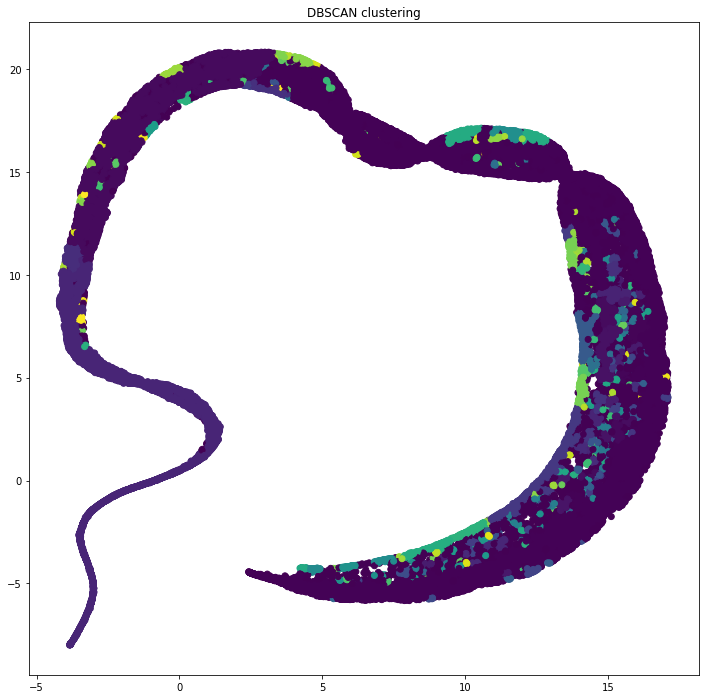

In [ ]:
X_normilized = StandardScaler().fit_transform(X_embedded_umap)

db = DBSCAN(eps=0.01).fit(X_normilized)

plt.figure(figsize=(12, 12))
plt.scatter(X_embedded_umap[:, 0], X_embedded_umap[:, 1], c=db.labels_)
plt.title("DBSCAN clustering (eps=0.01) for UMAP embedding")
plt.show()

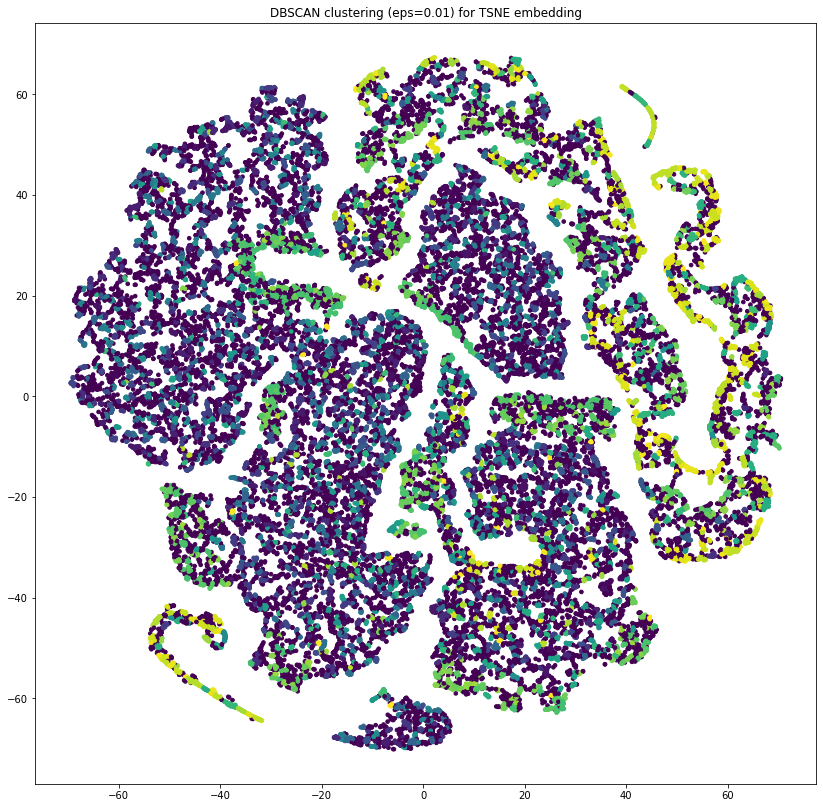

In [ ]:
X_normilized = StandardScaler().fit_transform(X_embedded_tsne)

db = DBSCAN(eps=0.01).fit(X_normilized)

plt.figure(figsize=(14, 14))
plt.scatter(X_embedded_tsne[:, 0], X_embedded_tsne[:, 1], c=db.labels_, s=13)
plt.title("DBSCAN clustering (eps=0.01) for TSNE embedding")
plt.show()

### calulate metrics

In [ ]:
def calc_distances(X, labels):
    n_samples, _ = X.shape
    n_labels = len(np.unique(labels))

    intra_dist = 0.
    intra_num = 0
    outer_dist = 0.
    outer_num = 0

    for i in range(len(X)):
        for j in range(len(X)):
            if i>=j:
                continue
            if labels[i] == labels[j]:
                intra_dist += distance.euclidean(X[i], X[j])
                intra_num += 1
            else:
                outer_dist += distance.euclidean(X[i], X[j])
                outer_num += 1
    return (intra_dist/intra_num, outer_dist/outer_num)

In [ ]:
intra_dist, outer_dist = calc_distances(X_embedded_tsne, db.labels_)
print('mean within-cluster distance:', intra_dist)
print('mean between-cluster distance:', outer_dist)

mean within-cluster distance: 59.35644924110518
mean between-cluster distance: 60.15395127098117
